In [1]:
import seispy.utils.responses as rsps
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from seispy import plot as hplot
from seispy.station import homestake, spiral
from seispy.station.stationdata import SeismometerArray # for seismometer data
from seispy.station import StationArray # for station locations
from scipy.linalg import pinv, svd
from matplotlib import rc
rc('text', usetex=False)

In [2]:
duration=1000
freq=1
velocity=5700
amplitude=3
nside=16
# stations=spiral(100, radius=5000, n_per_turn=20)
stations=homestake(origin='TPK')

data = SeismometerArray.initialize_all_good(stations, duration, chans_type='fast_chans')
data.add_p_wave(amplitude, np.radians(30), np.radians(60), freq, duration, c=velocity)
# data.add_white_noise(1)

In [4]:
myffts = data.get_ffts(1)

In [6]:
recovery_object, Fisher, InvFisher = data.coherent_recovery('p', [5700], stations=stations,
                                                      inv_condition=1e-12,
                                                      frequency=freq,
                                                      nside=nside,
                                                      return_mode=1)
# what is output now is an "object"
# here's how to access the map we want:
recovery = recovery_object.maps[freq]['p']

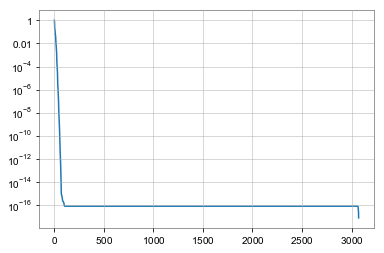

In [7]:
u, s, vh = svd(Fisher)
plt.plot(s/max(s))
plt.yscale('log')
plt.show()

In [11]:
sigma2 = np.dot(InvFisher, InvFisher.T.conj())

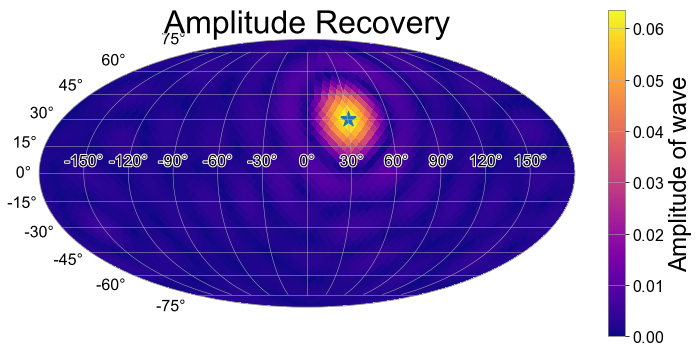

In [8]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')

hplot.healpix_heatmap(np.abs(recovery), cmap='plasma', vmin=0, vmax=np.abs(recovery).max())
h = plt.colorbar()
h.ax.set_ylabel('Amplitude of wave', fontsize=24)
h.ax.tick_params(labelsize=16)
plt.title("Amplitude Recovery", fontsize=32)
hplot.outline_text(ax)
ax.scatter(np.radians(30), np.radians(30), marker='*', s=256, color='C0')
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
ax.tick_params(labelsize=16)
plt.show()

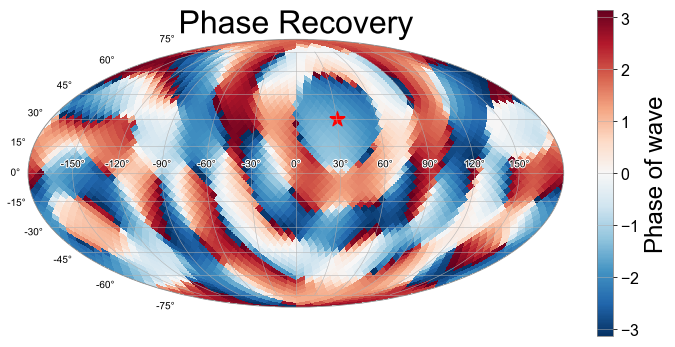

In [9]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
hplot.healpix_heatmap(np.angle(recovery), cmap='RdBu_r', vmin=-np.pi, vmax=np.pi)
h = plt.colorbar(label='Phase of wave')
h.ax.set_ylabel('Phase of wave', fontsize=24)
h.ax.tick_params(labelsize=16)
plt.title("Phase Recovery", fontsize=32)
hplot.outline_text(ax)
ax.scatter(np.radians(30), np.radians(30), marker='*', s=256, color='r')
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

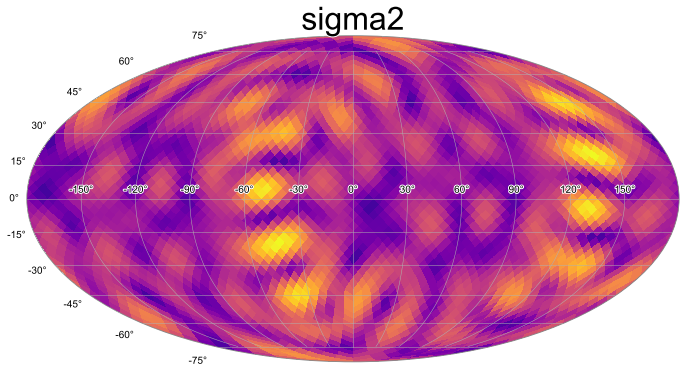

In [12]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
hplot.healpix_heatmap(np.sqrt(np.diag(np.abs(sigma2))), cmap='plasma', vmin=0, vmax=np.sqrt(np.abs(sigma2)).max())
# plt.colorbar()
plt.title("sigma2", fontsize=32)
hplot.outline_text(ax)
# ax.scatter(np.radians(45), 0, marker='*', s=256, color='C1')
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

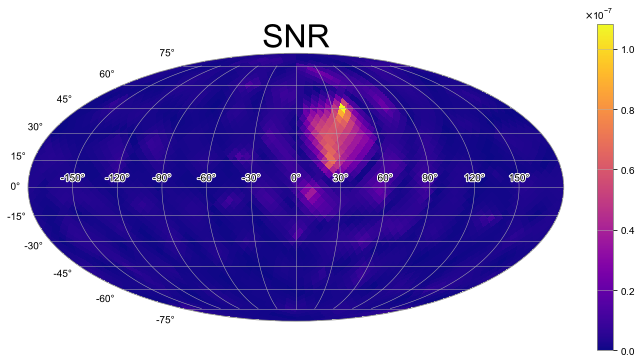

In [13]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
SNR = np.abs(recovery) / np.sqrt(np.diag(np.abs(sigma2)))
hplot.healpix_heatmap(SNR, cmap='plasma', vmin=0, vmax=SNR.max())
plt.colorbar()
plt.title("SNR", fontsize=32)
hplot.outline_text(ax)
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

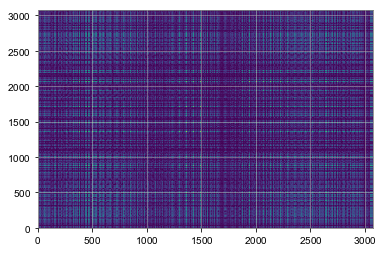

In [14]:
import matplotlib
plt.pcolormesh(np.abs(sigma2))
plt.show()

In [15]:
MRM = np.dot(InvFisher, Fisher)
print(MRM.shape)

(3072, 3072)


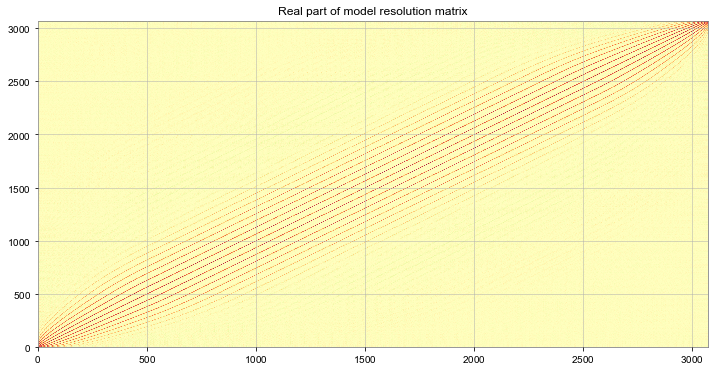

In [16]:
plt.figure(figsize=(12,6))
plt.pcolormesh(np.real(MRM), cmap='Spectral_r', vmin=-np.abs(np.real(MRM)).max(), vmax=np.abs(np.real(MRM).max()))
plt.title('Real part of model resolution matrix')
plt.show()

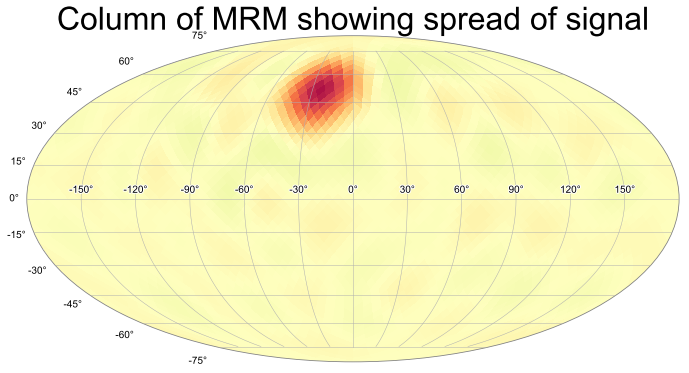

In [17]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
hplot.healpix_heatmap(np.real(MRM[:, 360]), cmap='Spectral_r', vmin=-np.abs(MRM).max(), vmax=np.abs(MRM).max())
# plt.colorbar()
plt.title("Column of MRM showing spread of signal", fontsize=32)
hplot.outline_text(ax)
# ax.scatter(np.radians(45), 0, marker='*', s=256, color='C1')
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

In [18]:
print(np.abs(np.sum(MRM[:,360])))

0.999397208047


In [19]:
np.abs(np.sum(recovery))

3.0029550580138467

In [20]:
np.abs(np.sum(recovery))**2

9.0177390804509443

In [21]:
print(np.sum(np.abs(myffts[:3])**2))

9.0


In [22]:
myffts[:3]

array([ 2.04665843-0.93471346j,  1.18163880-0.53965707j,
        1.36443895-0.62314231j])